In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt

#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve



Using TensorFlow backend.


In [2]:
import pickle

In [3]:
%run custom_functions_test.ipynb

In [4]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [5]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [6]:
X = df.drop(['label'], axis = 1)

In [7]:
y = df['label']

In [8]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y, test_size=0.20, random_state=123)

In [9]:
#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, stratify = y_model, test_size=0.20, random_state=123)

## Comparing Vectorization and Method Performance

In [10]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression(random_state=10)
rfc = RandomForestClassifier(random_state=10)
nb = MultinomialNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



## Testing Check

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics2, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='smote')

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='upsample')

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='downsample')

In [ ]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, log, count_vect)

## Multinomial Naive Bayes

In [ ]:
np.random.seed(0)

In [36]:
nb_results1 = compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), vectorization_list)

nb_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.94,0.94,0.93
Train F1,0.74,0.36,0.37,0.14
Train Precision,0.83,0.90,0.91,0.89
Train Recall,0.66,0.23,0.23,0.08
Validation Accuracy,0.96,0.94,0.94,0.93
Validation F1,0.60,0.36,0.35,0.13
Validation Precision,0.86,0.89,0.86,0.87
Validation Recall,0.46,0.22,0.22,0.07


In [ ]:
nb_results1.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [21]:
nb_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'upsample')
nb_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.90,0.91,0.77
Train F1,0.97,0.90,0.91,0.73
Train Precision,0.96,0.90,0.91,0.89
Train Recall,0.99,0.91,0.90,0.61
Validation Accuracy,0.92,0.89,0.90,0.88
Validation F1,0.57,0.51,0.53,0.35
Validation Precision,0.45,0.37,0.40,0.29
Validation Recall,0.79,0.81,0.78,0.45


In [ ]:
nb_results3.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [22]:
nb_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'downsample')
nb_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.92,0.93,0.81
Train F1,0.97,0.92,0.93,0.78
Train Precision,0.97,0.92,0.94,0.92
Train Recall,0.98,0.92,0.93,0.68
Validation Accuracy,0.84,0.85,0.86,0.84
Validation F1,0.44,0.45,0.45,0.32
Validation Precision,0.29,0.31,0.31,0.23
Validation Recall,0.89,0.86,0.83,0.53


In [ ]:
nb_results4.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [23]:
nb_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'smote')
nb_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.88,0.88,0.83
Train F1,0.76,0.50,0.51,0.27
Train Precision,0.68,0.35,0.35,0.19
Train Recall,0.85,0.89,0.90,0.44
Validation Accuracy,0.95,0.87,0.87,0.83
Validation F1,0.64,0.46,0.46,0.22
Validation Precision,0.60,0.32,0.32,0.16
Validation Recall,0.67,0.81,0.79,0.36


In [ ]:
nb_results5.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

## Logistic Regression

In [15]:
%run custom_functions_test.ipynb

In [13]:
#Logistic Regression: compare vectorizers with no presets
lr_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', random_state = 10), 
                                            vectorization_list)

lr_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.95,0.95,0.93
Train F1,0.89,0.47,0.47,0.14
Train Precision,0.99,0.88,0.89,0.96
Train Recall,0.80,0.32,0.32,0.08
Validation Accuracy,0.96,0.95,0.95,0.93
Validation F1,0.64,0.48,0.45,0.13
Validation Precision,0.85,0.89,0.85,0.87
Validation Recall,0.51,0.33,0.31,0.07


In [14]:
lr_results1.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [15]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
lr_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight= 'balanced', 
                            solver = 'lbfgs', random_state = 10), vectorization_list)
lr_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.89,0.90,0.53
Train F1,0.93,0.54,0.56,0.22
Train Precision,0.87,0.38,0.40,0.12
Train Recall,0.99,0.92,0.93,0.93
Validation Accuracy,0.95,0.88,0.88,0.51
Validation F1,0.66,0.48,0.48,0.20
Validation Precision,0.62,0.34,0.34,0.11
Validation Recall,0.72,0.81,0.80,0.86


In [16]:
lr_results2.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [17]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
lr_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', 
                            random_state = 10), vectorization_list, sampling = 'upsample')
lr_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.94,0.96,0.79
Train F1,0.99,0.94,0.96,0.77
Train Precision,0.99,0.92,0.94,0.86
Train Recall,1.00,0.96,0.98,0.70
Validation Accuracy,0.95,0.91,0.92,0.86
Validation F1,0.67,0.55,0.56,0.34
Validation Precision,0.63,0.43,0.44,0.25
Validation Recall,0.70,0.77,0.77,0.50


In [18]:
lr_results3.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [19]:
#Logistic Regression: compare vectorizers using lemmitizing + downsampling
lr_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'downsample')
lr_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.93,0.94,0.82
Train F1,0.99,0.93,0.94,0.80
Train Precision,1.00,0.92,0.94,0.91
Train Recall,0.99,0.94,0.95,0.71
Validation Accuracy,0.85,0.84,0.83,0.82
Validation F1,0.44,0.42,0.41,0.30
Validation Precision,0.30,0.28,0.27,0.21
Validation Recall,0.84,0.84,0.83,0.55


In [20]:
lr_results4.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [21]:
#Logistic Regression: compare vectorizers using lemmitizing + smote
lr_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
lr_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.89,0.90,0.56
Train F1,0.75,0.52,0.55,0.22
Train Precision,0.66,0.38,0.40,0.13
Train Recall,0.87,0.83,0.84,0.89
Validation Accuracy,0.89,0.88,0.88,0.54
Validation F1,0.48,0.47,0.47,0.20
Validation Precision,0.36,0.34,0.35,0.11
Validation Recall,0.70,0.75,0.74,0.81


In [ ]:
lr_results5.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [ ]:
# with open('mycsvfile.csv','a') as f:
#     w = csv.writer(f)
#     w.writerows(LR_cw_lemm.items())

In [ ]:
# (pd.DataFrame.from_dict(data= LR_cw_lemm).to_csv('dict_file.csv', header=False))

### Grid Searching

In [40]:
logreg = LogisticRegression(random_state= 10)

c_space = np.linspace(0.1, 10, 100)

parameters = {'C': c_space, 
          'penalty': ['l1', 'l2']}

scores = ['accuracy','recall','precision','f1']

lr_rs = RandomizedSearchCV(logreg, param_distributions = parameters, 
                           verbose = 0, scoring = scores, cv = 3, refit = 'f1')

In [11]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)

In [12]:
lr_rs.fit(X_train_countvect, y_train)

NameError: name 'lr_rs' is not defined

In [43]:
lr_rs.best_params_

{'penalty': 'l1', 'C': 2.5000000000000004}

In [42]:
lr_rs.best_estimator_

LogisticRegression(C=2.5000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
pd.DataFrame(lr_rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.119134,0.010985,0.013851,0.001698,l2,0.3,"{'penalty': 'l2', 'C': 0.30000000000000004}",0.948380,0.948519,0.947932,...,0.886792,0.859335,0.022185,1,0.474627,0.464122,0.442700,0.460484,0.013286,10
1,0.151833,0.014365,0.013809,0.001801,l1,2.5,"{'penalty': 'l1', 'C': 2.5000000000000004}",0.957325,0.957612,0.953799,...,0.774411,0.785217,0.009785,9,0.641184,0.636478,0.593548,0.623738,0.021432,1
2,0.178762,0.008768,0.016889,0.001160,l2,1.3,"{'penalty': 'l2', 'C': 1.3000000000000003}",0.955272,0.953799,0.954385,...,0.846473,0.829564,0.012311,2,0.594954,0.567901,0.567455,0.576771,0.012859,9
3,0.211165,0.019254,0.013911,0.001920,l2,8.6,"{'penalty': 'l2', 'C': 8.6}",0.954832,0.957172,0.954092,...,0.793594,0.786099,0.015353,6,0.615960,0.629442,0.587615,0.611006,0.017431,3
4,0.202837,0.018336,0.013718,0.001467,l2,7.6,"{'penalty': 'l2', 'C': 7.6}",0.955419,0.957026,0.953945,...,0.792857,0.788834,0.010618,5,0.619048,0.627700,0.585752,0.610834,0.018083,5
5,0.154226,0.009588,0.010245,0.000100,l1,5.7,"{'penalty': 'l1', 'C': 5.7}",0.957472,0.955559,0.951599,...,0.729814,0.754458,0.018373,10,0.648058,0.628221,0.587500,0.621261,0.025208,2
6,0.189422,0.006087,0.012174,0.002183,l2,3.9,"{'penalty': 'l2', 'C': 3.9000000000000004}",0.957032,0.955852,0.955119,...,0.830769,0.814981,0.011185,3,0.624840,0.607562,0.585366,0.605924,0.016157,8
7,0.181982,0.019711,0.014381,0.002284,l2,4.6,"{'penalty': 'l2', 'C': 4.6}",0.956152,0.956145,0.955265,...,0.826415,0.808727,0.013990,4,0.620076,0.611183,0.589502,0.606921,0.012841,7
8,0.197510,0.021463,0.011610,0.000873,l2,8.7,"{'penalty': 'l2', 'C': 8.7}",0.954832,0.957172,0.954092,...,0.793594,0.786099,0.015353,6,0.615960,0.629442,0.587615,0.611006,0.017431,3
9,0.181143,0.011962,0.011944,0.000893,l2,9.4,"{'penalty': 'l2', 'C': 9.4}",0.954832,0.957026,0.953945,...,0.792857,0.785638,0.015038,8,0.615960,0.627700,0.585752,0.609804,0.017669,6


In [22]:
lr_rs.best_score_

NameError: name 'lr_rs' is not defined

In [12]:
logreg = LogisticRegression(penalty = 'l1', C = 2.5, random_state= 10)

In [13]:
%run custom_functions_test.ipynb

In [62]:
lr_X_train, lr_X_val, lr_y_train_pred, lr_y_val_pred, lr_y_val_prob, lr_metrics_dict, lr_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, logreg, count_vect)

In [16]:
lr_metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 0.95,
 'Train F1': 0.98,
 'Validation Accuracy': 0.96,
 'Validation Precision': 0.78,
 'Validation Recall': 0.58,
 'Validation F1': 0.66}

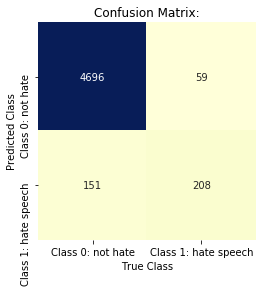

In [17]:
#want to reduce number of records predicted as 0 that are actually 1 
seaborn_confusion_matrix(y_val, lr_y_val_pred)

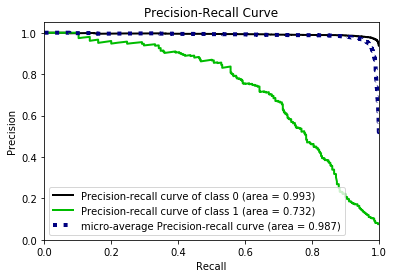

In [110]:
skplt.metrics.plot_precision_recall_curve(y_val, lr_y_val_prob)

In [28]:
type(lr_y_val_prob)

numpy.ndarray

In [27]:
pd.DataFrame(lr_y_val_prob)

,0,1
0,0.734179,2.658212e-01
1,0.998912,1.088218e-03
2,0.985182,1.481846e-02
3,0.999210,7.895557e-04
4,0.999920,7.965528e-05
5,0.985475,1.452514e-02
6,0.998299,1.700871e-03
7,0.998087,1.912583e-03
8,0.978478,2.152178e-02
9,0.999119,8.808517e-04


In [52]:
%run custom_functions_test.ipynb

Adjusted Accuracy: 0.9569808369182636
Adjusted Precision: 0.8797814207650273
Adjusted Recall: 0.44846796657381616
Adjusted F1 Score: 0.5940959409594097




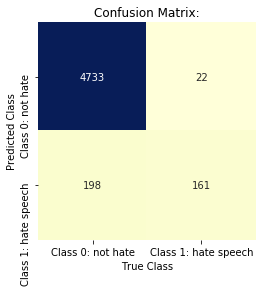

In [63]:
lr_pred_adj, cm = adjust_threshold_and_score(y_val, lr_y_val_prob, .2)

In [56]:
type(lr_pred_adj2)

list

In [64]:
lr_pred_df['adjusted class'] = lr_pred_adj

In [59]:
lr_pred_df.head()

,prob 0,prob 1,predicted class,actual class,adjusted_class
17498,0.73,0.27,0,0,0
9203,1.00,0.00,0,0,0
17380,0.99,0.01,0,0,0
25176,1.00,0.00,0,0,0
3828,1.00,0.00,0,0,0


In [65]:
lr_misclassified_df = lr_pred_df[lr_pred_df['predicted class'] != lr_pred_df['actual class']]
lr_misclassified_df.head()

,prob 0,prob 1,predicted class,actual class,adjusted class
12608,0.94,0.06,0,1,0
23876,0.45,0.55,1,0,0
28669,0.75,0.25,0,1,0
14414,0.49,0.51,1,0,0
2748,0.72,0.28,0,1,0


In [69]:
lr_misclassified_df.shape

(210, 5)

In [68]:
lr_misclassified2_df = lr_misclassified_df[lr_misclassified_df['adjusted class'] != lr_misclassified_df['actual class']]
lr_misclassified2_df.shape

(173, 5)

In [152]:
df.tweet[28669]

'#nazi #swastika #ebay! #trump #donaldtrump #republic#whitepower'

In [151]:
df.tweet[23876]

'@user so you failed to hijack the #democraticpay and now demand insane #bs. #yousuck #nolegacy    oldman @user'

In [153]:
df.lem_tweet[28669]

'nazi swastika ebay trump donaldtrump republicwhitepower'

##  Final Logistic Regression Model

In [114]:
X_model_countvect =  count_vect.fit_transform(X_model.lem_tweet)
X_test_countvect =  count_vect.transform(X_test.lem_tweet)

In [115]:
log = LogisticRegression(penalty = 'l1', C = 2.5, random_state= 10)

In [116]:
log.fit(X_model_countvect, y_model)

LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
lr_y_pred_test = log.predict(X_test_countvect)

In [125]:
lr_y_prob_test = log.predict_proba(X_test_countvect)

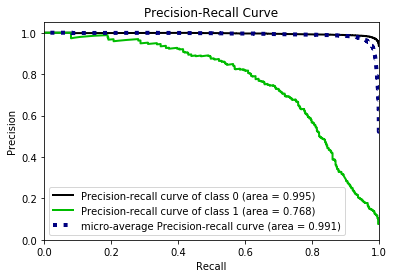

In [133]:
# skplt.metrics.plot_precision_recall_curve(y_test, lr_y_prob_test)

In [127]:
print_confusion_matrix(y_test, lr_y_pred_test)

,predicted 0,predicted 1
actual 0,5885,60
actual 1,180,268


Adjusted Accuracy: 0.9580791490692946
Adjusted Precision: 0.6890756302521008
Adjusted Recall: 0.7321428571428571
Adjusted F1 Score: 0.7099567099567099




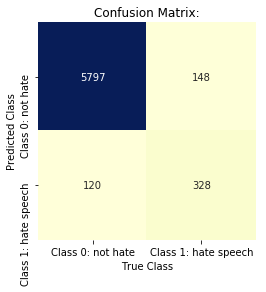

In [132]:
adjust_threshold_and_score(y_test, lr_y_prob_test, .8)

## Testing on Test Set

## SVM


In [ ]:
svm_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', probability = True, random_state = 10), 
                            vectorization_list)
svm_results1 

In [ ]:
# svm_results1.to_csv('data/SVM_results.csv',mode = 'a',header ='column_names')

In [ ]:
svm_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', class_weight = 'balanced', probability = True, random_state = 10), 
                            vectorization_list)
svm_results2

In [ ]:
# svm_results2.to_csv('data/SVM_results.csv', mode = 'a',header ='column_names')

In [20]:
%run custom_functions_test.ipynb

In [11]:
# svm_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
#                             y_train, X_val.lem_tweet, y_val, 
#                             SVC(gamma='auto', random_state = 10), 
#                             vectorization_list, sampling = 'upsample')
# svm_results3 

KeyboardInterrupt: 

In [18]:
svm_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma= 'auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'downsample')
svm_results4 

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.51,0.84,0.80,0.54
Train F1,0.67,0.85,0.76,0.14
Train Precision,0.51,0.80,0.94,0.99
Train Recall,1.00,0.91,0.63,0.08
Validation Accuracy,0.10,0.74,0.89,0.93
Validation F1,0.13,0.32,0.45,0.13
Validation Precision,0.07,0.20,0.35,1.00
Validation Recall,1.00,0.89,0.60,0.07


In [ ]:
# svm_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
#                             y_train, X_val.lem_tweet, y_val, 
#                             SVC(gamma='auto', probability = True, random_state = 10), 
#                             vectorization_list, sampling = 'smote')
# svm_results5 

#### Grid Searching:

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
svc = SVC

params = {
'C': [0.1,.2, .5, 0.8, 1, 1.5, 2.0, 3.0, 4.0, 5.0],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4],
'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}]}

scores = ['accuracy','recall','precision','f1']

scv_rs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
svm_rs.fit(X_train_tfid2, y_train)

In [ ]:
svm_rs.best_estimator_

# Random Forest

### Compare Multiple Methods:

In [ ]:
 RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10)

In [ ]:
#Random Forest: compare vectorizers with lemmatizing; no hyperparameter tuning
rfc_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), vectorization_list)
rfc_results1

In [ ]:
# rfc_results1.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')


In [ ]:
#Random Forest: compare vectorizers with lemmatizing and class weights balanced
rfc_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10, class_weight = 'balanced'), 
                            vectorization_list)
rfc_results2

In [ ]:
# rfc_results2.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [ ]:
#Random Forest: compare vectorizers with lemmatizing and upsampling
rfc_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'upsample')
rfc_results3

In [ ]:
# rfc_results3.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [ ]:
#Random Forest: compare vectorizers with lemmatizing and downsampling
rfc_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'downsample')
rfc_results4

In [ ]:
# rfc_results4.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [ ]:
#Random Forest: compare vectorizers with lemmatizing and smote
rfc_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
rfc_results5

In [ ]:
# rfc_results5.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

### Grid-Searching For Best Fit for Count Vectorizer

In [ ]:
np.random.seed(0)

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [ ]:
# rfc = RandomForestClassifier(random_state=10)

# parameters = {'n_estimators' : [40, 60, 80, 100, 120, 150],
# 'max_leaf_nodes' : [100, 200, 400, 600],
# 'random_state' : [10],
# 'max_depth': [5, 7, 10, 20, 30],
#  'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}] }
# # 'class_weight': ['balanced', 'balanced_subsample']}
          
# rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv = 3)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(10)
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100, 120],
'max_leaf_nodes' : [100, 200, 300, 400],
'random_state' : [10],
'max_depth': [5, 6, 7, 8, 10, 20, 25, 30],
 'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:6, 1: 4}, {0:8, 1:2}]}
'class_weight': ['balanced', 'balanced_subsample']}

scores = ['accuracy','recall','precision','f1']

rfc_gs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
rfc_gs.fit(X_train_countvect, y_train)

In [ ]:
rfc_gs.best_params_

In [ ]:
rfc_gs.best_score_

In [ ]:
rfc_df = pd.DataFrame(rfc_gs.cv_results_)
rfc_df

In [ ]:
rfc_df[rfc_df.rank_test_precision==1]

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)

In [ ]:
rfc3 = RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, class_weight='balanced_subsample',
                            max_depth = 25, random_state=10)

In [ ]:
rfc3.fit(X_train_countvect, y_train)

In [ ]:
y_rfc2_pred = rfc3.predict(X_train_countvect)

In [ ]:
metrics.f1_score(y_train, y_rfc2_pred)

In [ ]:
rfc_metrics2= \
wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200,
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            vectorization_list)

In [ ]:
rfc_metrics2

In [ ]:
rfc_metrics

In [ ]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, 
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            count_vect)

In [ ]:
print_classification_report(y_val, rfc_y_val_pred)

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
# print confusion matrix    
pd.DataFrame(confusion_matrix(y_val, rfc_y_val_pred), index = ['actual 0','actual 1'], columns = ['predicted 0', 'predicted 1'])

In [ ]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, 
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            count_vect)

In [ ]:
rfc_y_val_prob

In [ ]:
rfc_pred_df.head()

In [ ]:
rfc_pred_df.threshold.values

In [ ]:
pr_threshold_df.head()

In [ ]:
# def frange(start, stop, step):
#     i = start
#     while i < stop:
#         yield i
#         i += step

# names = ['cut_off', 'recall', 'precision']
# pr_threshold_df = pd.DataFrame()

# # for loop to test different cut-off values
# for i in frange(.2,.95,.015):
#     rfc_pred_df['threshold'] = np.where(rfc_pred_df['prob 1'] >= i, 1, 0)
#     tn, fp, fn, tp = confusion_matrix(rfc_pred_df['actual class'], rfc_pred_df['predicted class']).ravel()
#     recall = tp/(tp+fn)
#     precision = tp/(tp+fp)
#     evals = [i,recall, precision]
#     pr_threshold_df = pr_threshold_df.append(pd.Series(evals), ignore_index=True)

# pr_threshold_df.columns = names

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('seaborn-whitegrid')
# # plot the data
# plt.plot(pr_threshold_df.recall, pr_threshold_df.precision , '-', color='blue')
# plt.plot(pr_threshold_df.recall, pr_threshold_df.precision , 'o', color='black')

# plt.title('Precision-Recall curve')
# plt.ylabel('Precision')
# plt.xlabel('Recall')
# plt.savefig('pr_curve')


In [ ]:
skplt.metrics.plot_precision_recall_curve(y_val, rfc_y_val_prob)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight={0: 2, 1: 8},
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=400, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [ ]:
rfc2.fit(X_train_countvect, y_train)

In [ ]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train, y_train_predict)

In [ ]:
y_val_predict = rfc2.predict(X_val_countvect)

In [ ]:
metrics.f1_score(y_val, y_val_predict)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(rfc2):
    n_features = X_val_countvect.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), rfc2.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), countvect.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc2)

# Word to Vec

In [ ]:
type(df.tokenized_tweet[0])

In [ ]:
(X_train.tokenized_tweet[0])

In [ ]:
X_train.tokenized_tweet.head()

### X-train pre-processing

In [ ]:
X_train.tokenized_tweet.shape

In [ ]:
X_train_token_list = list(X_train.tokenized_tweet)

In [ ]:
type(X_train_token_list[0])

In [ ]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [ ]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

#### X-val pre-processing

In [ ]:
X_val_token_list = list(X_val['tokenized_tweet'])
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

#### X-test pre-processing

In [ ]:
X_test_token_list = list(X_test['tokenized_tweet'])
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

### Training Model

In [ ]:
from time import time
t = time()

w2v_model = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.train(X_train_token_list, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

In [ ]:
w2v_model.save('data/w2v.model')

w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [ ]:
w2v.corpus_count

In [ ]:
w2v_vocab= w2v.wv.vocab

In [ ]:
len(w2v_vocab)

In [ ]:
w2v.wv.vectors.shape

In [ ]:
w2v.wv['trump']

In [ ]:
w2v.wv.most_similar(['trump'])

In [ ]:
w2v.wv.most_similar(['racist'])

In [ ]:
w2v.wv.most_similar(positive=['lazy','black'])

In [ ]:
w2v.wv

In [ ]:
w2v.wv.get_keras_embedding

In [ ]:
w2v_X = w2v.wv.vectors

## Classification with Word2Vec

In [ ]:
sentence = X_train_token_list[1]
sentence

In [ ]:
X_train_w2v[20]

In [ ]:
#create average vector for train and test from model
#returned list of numpy arrays are then stacked 

X_train_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_train_token_list])

X_val_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_val_token_list])

In [ ]:
X_train_w2v_2[10]

## Classification with Word Embeddings

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, RandomForestClassifier())

### Glove

In [ ]:
# from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = 'data/glove.twitter.27B.100d.txt'
# glove_output_file = 'data/glove.txt.word2vec'
# glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [ ]:
w2v.most_similar('black')

In [ ]:
glove_model.most_similar('black')

In [ ]:
glove_model['love']

In [ ]:
X_train_token_list[0]

In [ ]:
X_train_glove2 = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_glove2, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_val_token_list])

In [ ]:
X_train_w2v[10]

In [ ]:
X_train_w2v_2[10]

In [ ]:
X_train_glove[255]

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression (class_weight='balanced'))

##  Testing Scraped Trump Tweets

In [ ]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [ ]:
logreg = LogisticRegression(class_weight='balanced')

In [ ]:
logreg.fit(X_train_countvect, y_train_up)

In [ ]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [ ]:
X_trump = X_trump.toarray()

In [ ]:
X_trump.shape

In [ ]:
y_trump_predict = logreg.predict(X_trump)

In [ ]:
y_trump_predict

In [ ]:
trump_df['predictions'] = y_trump_predict

In [ ]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [ ]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [ ]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [ ]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [ ]:
trump0 = trump_df[trump_df.predictions == 0]

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
trump0.tweet

In [ ]:
trump_df

In [ ]:
trump_df[trump_df.predictions == 0]

In [ ]:
trump1 = trump_df[trump_df.predictions == 1]

In [ ]:
trump1.tweet